In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
data = np.array([
    [0.6, 1.9],
    [1.8, 1.6],
    [2.7, 2.0],
    [3.0, 2.1],
    [3.0, 2.6],
    [3.1, 4.5],
    [3.8, 0.6],
    [4.2, 2.7]
])
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

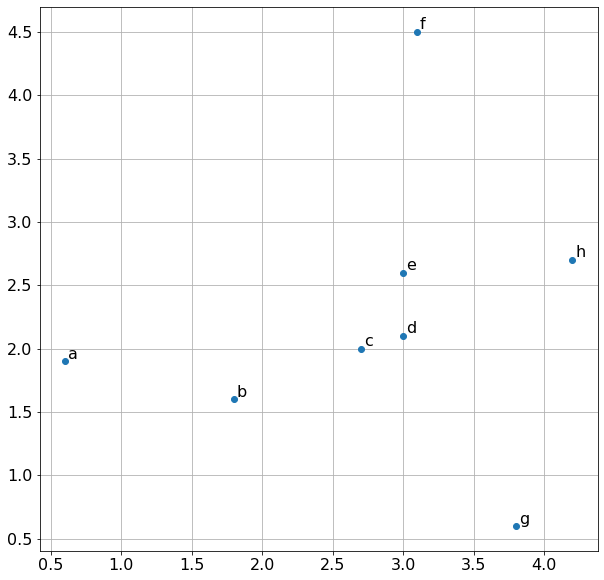

In [3]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(10, 10))
plt.grid()

plt.plot(data[:, 0], data[:, 1], 'o')
for i in range(len(letters)):
    plt.text(data[i, 0]+0.02, data[i, 1]+0.02, letters[i])

In [4]:
sl = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='cosine', compute_distances=True).fit(data)
sl.labels_

array([0, 0, 0, 0, 0, 0, 1, 0])

Text(0.5, 1.0, 'single-linkage')

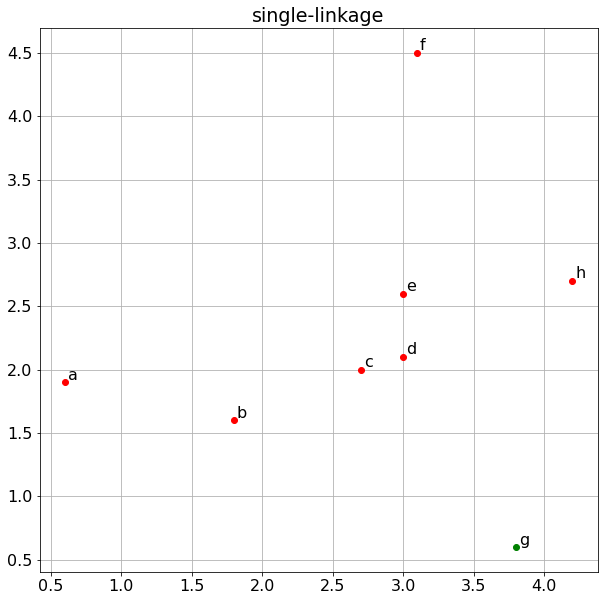

In [5]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(10, 10))
plt.grid()

plt.plot(data[:, 0][sl.labels_ == 0], data[:, 1][sl.labels_ == 0], 'o', c='red')
plt.plot(data[:, 0][sl.labels_ == 1], data[:, 1][sl.labels_ == 1], 'o', c='green')
for i in range(len(letters)):
    plt.text(data[i, 0]+0.02, data[i, 1]+0.02, letters[i])
plt.title('single-linkage')

In [6]:
cl = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='cosine', compute_distances=True).fit(data)
cl.labels_

array([1, 0, 0, 0, 0, 1, 0, 0])

Text(0.5, 1.0, 'complete-linkage')

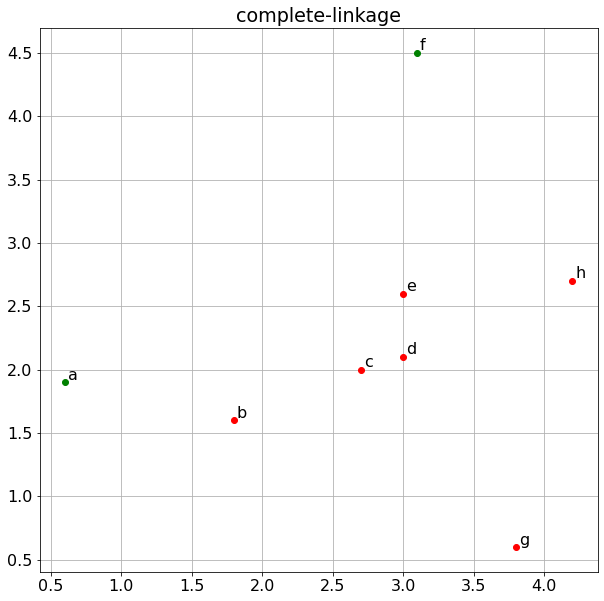

In [7]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(10, 10))
plt.grid()

plt.plot(data[:, 0][cl.labels_ == 0], data[:, 1][cl.labels_ == 0], 'o', c='red')
plt.plot(data[:, 0][cl.labels_ == 1], data[:, 1][cl.labels_ == 1], 'o', c='green')
for i in range(len(letters)):
    plt.text(data[i, 0]+0.02, data[i, 1]+0.02, letters[i])
plt.title('complete-linkage')

In [13]:
km = KMeans(n_clusters=2, random_state=0, init=data[[5, 6], :], n_init=1).fit(data)
km.labels_

array([1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

Text(0.5, 1.0, 'kmeans')

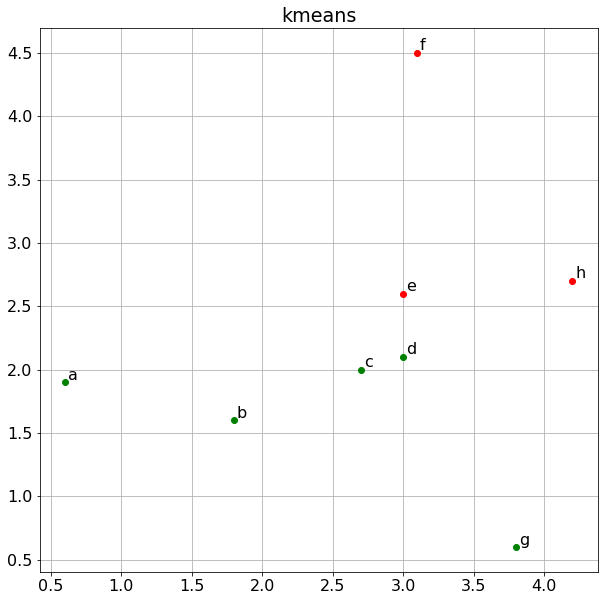

In [14]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(10, 10))
plt.grid()

plt.plot(data[:, 0][km.labels_ == 0], data[:, 1][km.labels_ == 0], 'o', c='red')
plt.plot(data[:, 0][km.labels_ == 1], data[:, 1][km.labels_ == 1], 'o', c='green')
for i in range(len(letters)):
    plt.text(data[i, 0]+0.02, data[i, 1]+0.02, letters[i])
plt.title('kmeans')

In [10]:
# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack(
#         [model.children_, model.distances_, counts]
#     ).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)

# font = {'size': 16}
# plt.rc('font', **font)
# fig = plt.figure(figsize=(10, 8))
# plot_dendrogram(sl)